# Project: Wrangling and Analyze Data

In [62]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO
from sqlalchemy import create_engine

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
rate_df = pd.read_csv('twitter-archive-enhanced.csv')
rate_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [10]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)  
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [11]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [12]:
tweepy_df = pd.read_json("tweet_json.txt", lines=True)
tweepy_df.head()

contributors  coordinates          created_at display_text_range  \
0           NaN          NaN 2017-08-01 16:23:56            [0, 85]   
1           NaN          NaN 2017-08-01 00:17:27           [0, 138]   
2           NaN          NaN 2017-07-31 00:18:03           [0, 121]   
3           NaN          NaN 2017-07-30 15:58:51            [0, 79]   
4           NaN          NaN 2017-07-29 16:00:24           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39467   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33819   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25461   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42908   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41048   

   favorited                                          full_text  geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  NaN   
1      False  This is Tilly. She's just checking pup on you....  NaN   
2      False  This is Archie. He is a rare Norwegian Pouncin...  NaN   
3      False  This is Darla. She commenced a snooze mid meal...  NaN   
4      False  This is Franklin. He would like you to stop ca...  NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

   possibly_sensitive_appealable  quoted_status quoted_status_id  \
0                            0.0            NaN              NaN   
1                            0.0            NaN              NaN   
2                            0.0            NaN              NaN   
3                            0.0            NaN              NaN   
4                            0.0            NaN              NaN   

   quoted_status_id_str  retweet_count  retweeted  retweeted_status  \
0                   NaN           8853      False               NaN   
1                   NaN           6514      False               NaN   
2                   NaN           4328      False               NaN   
3                   NaN           8964      False               NaN   
4                   NaN           9774      False               NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 31 columns]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual and Programmatic assessment of the data

To outline quality and tidyness issues with the dataset that needs to be cleaned, each dataset was assessd by visually and programmatically. See below

In [13]:
rate_df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [14]:
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
rate_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [16]:
rate_df.name.sample(10)

142     Meatball
2228      Jareld
2002        Jazz
866         None
1098        None
1598        None
1589        Mona
406        Balto
1707        None
885         None
Name: name, dtype: object

In [18]:
rate_df.loc[rate_df['retweeted_status_id'].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
91    874434818259525634                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
109   871166179821445120                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
130   867072653475098625                    NaN                  NaN   
132   866816280283807744                    NaN                  NaN   
137   866094527597207552                    NaN                  NaN   
146   863471782782697472                    NaN                  NaN   
155   861769973181624320                    NaN                  NaN   
159   860981674716409858                    NaN                  NaN   
160   860924035999428608                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
171   858860390427611136                    NaN                  NaN   
180   857062103051644929                    NaN                  NaN   
182   856602993587888130                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
195   855138241867124737                    NaN                  NaN   
204   852936405516943360                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
...                  ...                    ...                  ...   
784   775096608509886464                    NaN                  NaN   
794   773336787167145985                    NaN                  NaN   
800   772615324260794368                    NaN                  NaN   
811   771171053431250945                    NaN                  NaN   
815   771004394259247104                    NaN                  NaN   
818   770743923962707968                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
826   769335591808995329                    NaN                  NaN   
829   768909767477751808                    NaN                  NaN   
833   768554158521745409                    NaN                  NaN   
841   766864461642756096                    NaN                  NaN   
847   766078092750233600                    NaN                  NaN   
860   763167063695355904                    NaN                  NaN   
868   761750502866649088                    NaN                  NaN   
872   761371037149827077                    NaN                  NaN   
885   760153949710192640                    NaN                  NaN   
890   759566828574212096                    NaN                  NaN   
895   759159934323924993                    NaN                  NaN   
908   757729163776290825                    NaN                  NaN   
911   757597904299253760                    NaN                  NaN   
926   754874841593970688                    NaN                  NaN   
937   753298634498793472                    NaN                  NaN   
943   752701944171524096                    NaN                  NaN   
949   752309394570878976                    NaN         

In [19]:
rate_df.duplicated().sum()

0

In [20]:
rate_df['name'].str.islower().sum()

109

In [21]:
image_df

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [22]:
image_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [23]:
image_df.duplicated().sum()

0

In [24]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_df[image_df.jpg_url.duplicated()]

tweet_id                                            jpg_url  \
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1315  754874841593970688    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1333  757729163776290825    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1345  759159934323924993    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
1349  759566828574212096    https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg   
1364  761371037149827077  https://pbs.twimg.com/tweet_video_thumb/CeBym7...   
1368  761750502866649088    https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg   
1387  766078092750233600    https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg   
1407  770093767776997377    https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   
1417  771171053431250945    https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg   
1427  772615324260794368    https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg   
1446  775898661951791106    https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   
1453  776819012571455488    https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg   
1456  777641927919427584    https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg   
1463  778396591732486144    https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg   
1476  780496263422808064    https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   
1487  782021823840026624    https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg   
1495  783347506784731136    https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg   
1510  786036967502913536    https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg   
1522  788070120937619456    https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg   
1538  790723298204217344    https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   
1541  791026214425268224    https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg   
1564  793614319594401792    https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg   
1569  794355576146903043    https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg   
1571  794983741416415232    https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg   
1579  796177847564038144    https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg   
1588  798340744599797760    https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg   
1589  798628517273620480    https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
1590  798644042770751489    https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg   
1591  798665375516884993    https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg   
...                  ...                                                ...   
1619  802624713319034886    https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg   
1624  803692223237865472    https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg   
1627  804413760345620481    https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg   
1634  805958939288408065    https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg   
1636  806242860592926720    https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg   
1640  807059379405148160    https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg   
1645  808134635716833280    https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg   
1652  809808892968534016    https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg   
1683  813944609378369540    https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg   
1693  816014286006976512    https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg   
1699  816829038950027264    https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg   
1703  817181837579653120  https://pbs.twimg.com/ext_tw_video_thumb/81596...   
1712  818588835076603904    https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg   
1717  819015331746349057    https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg   
1718  819015337530290176    https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg   
1727  820446719150292993    https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg   
1736  821813639212650496    https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg   
1742  822647212903690241    https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg   
1746  823269594223824897    https://pbs.twimg.com/media/C2kzTGxWEA

In [26]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
tweepy_df

contributors  coordinates          created_at display_text_range  \
0              NaN          NaN 2017-08-01 16:23:56            [0, 85]   
1              NaN          NaN 2017-08-01 00:17:27           [0, 138]   
2              NaN          NaN 2017-07-31 00:18:03           [0, 121]   
3              NaN          NaN 2017-07-30 15:58:51            [0, 79]   
4              NaN          NaN 2017-07-29 16:00:24           [0, 138]   
5              NaN          NaN 2017-07-29 00:08:17           [0, 138]   
6              NaN          NaN 2017-07-28 16:27:12           [0, 140]   
7              NaN          NaN 2017-07-28 00:22:40           [0, 118]   
8              NaN          NaN 2017-07-27 16:25:51           [0, 122]   
9              NaN          NaN 2017-07-26 15:59:51           [0, 133]   
10             NaN          NaN 2017-07-26 00:31:25           [0, 130]   
11             NaN          NaN 2017-07-25 16:11:53           [0, 107]   
12             NaN          NaN 2017-07-25 01:55:32           [0, 106]   
13             NaN          NaN 2017-07-25 00:10:02            [0, 91]   
14             NaN          NaN 2017-07-24 17:02:04           [0, 118]   
15             NaN          NaN 2017-07-24 00:19:32           [0, 138]   
16             NaN          NaN 2017-07-23 00:22:39            [0, 86]   
17             NaN          NaN 2017-07-22 16:56:37           [0, 128]   
18             NaN          NaN 2017-07-22 00:23:06            [0, 87]   
19             NaN          NaN 2017-07-20 16:49:33           [0, 127]   
20             NaN          NaN 2017-07-19 16:06:48           [0, 127]   
21             NaN          NaN 2017-07-19 03:39:09           [0, 108]   
22             NaN          NaN 2017-07-19 00:47:34            [0, 99]   
23             NaN          NaN 2017-07-18 16:08:03            [0, 88]   
24             NaN          NaN 2017-07-18 00:07:08           [0, 129]   
25             NaN          NaN 2017-07-17 16:17:36           [0, 101]   
26             NaN          NaN 2017-07-16 23:58:41           [0, 121]   
27             NaN          NaN 2017-07-16 20:14:00            [0, 71]   
28             NaN          NaN 2017-07-15 23:25:31           [0, 131]   
29             NaN          NaN 2017-07-15 16:51:35          [27, 105]   
...            ...          ...                 ...                ...   
2324           NaN          NaN 2015-11-17 00:24:19           [0, 140]   
2325           NaN          NaN 2015-11-17 00:06:54           [0, 139]   
2326           NaN          NaN 2015-11-16 23:23:41           [0, 137]   
2327           NaN          NaN 2015-11-16 21:54:18            [0, 81]   
2328           NaN          NaN 2015-11-16 21:10:36           [0, 140]   
2329           NaN          NaN 2015-11-16 20:32:58           [0, 135]   
2330           NaN          NaN 2015-11-16 20:01:42           [0, 112]   
2331           NaN          NaN 2015-11-16 19:31:45           [0, 139]   
2332           NaN          NaN 2015-11-16 16:37:02           [0, 138]   
2333           NaN          NaN 2015-11-16 16:11:11           [0, 136]   
2334           NaN          NaN 2015-11-16 15:14:19            [0, 46]   
2335           NaN          NaN 2015-11-16 14:57:41            [0, 82]   
2336           NaN          NaN 2015-11-16 04:02:55           [0, 134]   
2337           NaN          NaN 2015-11-16 03:55:04           [0, 128]   
2338           NaN          NaN 2015-11-16 03:44:34           [0, 140]   
2339           NaN          NaN 2015-11-16 03:22:39           [0, 132]   
2340           NaN          NaN 2015-11-16 02:38:37           [0, 125]   
2341           NaN          NaN 2015-11-16 01:59:36           [0, 137]   
2342           NaN          NaN 2015-11-16 01:52:02           [0, 137]   
2343           NaN          NaN 2015-11-16 01:22:45           [0, 107]   
2344           NaN          NaN 2015-11-16 01:01:59           [0, 135]   
2345           NaN          NaN 2015-11-16 00:55:59           [0, 124]   
2346      

In [28]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [29]:
tweepy_df.loc[tweepy_df['retweeted_status'].notnull()]

contributors  coordinates          created_at display_text_range  \
31             NaN          NaN 2017-07-15 02:45:48            [0, 50]   
35             NaN          NaN 2017-07-13 01:35:06           [0, 133]   
67             NaN          NaN 2017-06-26 00:13:58           [0, 140]   
72             NaN          NaN 2017-06-24 00:09:53           [0, 140]   
73             NaN          NaN 2017-06-23 18:17:33           [0, 140]   
77             NaN          NaN 2017-06-21 19:36:23           [0, 122]   
90             NaN          NaN 2017-06-13 01:14:41           [0, 140]   
94             NaN          NaN 2017-06-11 00:25:14           [0, 137]   
96             NaN          NaN 2017-06-10 00:35:19           [0, 140]   
100            NaN          NaN 2017-06-08 04:17:07           [0, 140]   
108            NaN          NaN 2017-06-04 00:46:17           [0, 140]   
117            NaN          NaN 2017-05-31 18:47:24           [0, 140]   
123            NaN          NaN 2017-05-28 01:26:04           [0, 140]   
129            NaN          NaN 2017-05-23 17:40:04            [0, 88]   
131            NaN          NaN 2017-05-23 00:41:20           [0, 140]   
136            NaN          NaN 2017-05-21 00:53:21           [0, 140]   
145            NaN          NaN 2017-05-13 19:11:30           [0, 140]   
154            NaN          NaN 2017-05-09 02:29:07           [0, 124]   
158            NaN          NaN 2017-05-06 22:16:42           [0, 140]   
159            NaN          NaN 2017-05-06 18:27:40            [0, 82]   
164            NaN          NaN 2017-05-04 17:01:34           [0, 140]   
170            NaN          NaN 2017-05-01 01:47:28           [0, 140]   
179            NaN          NaN 2017-04-26 02:41:43           [0, 140]   
181            NaN          NaN 2017-04-24 20:17:23           [0, 139]   
184            NaN          NaN 2017-04-24 02:15:55           [0, 104]   
193            NaN          NaN 2017-04-21 02:22:29           [0, 140]   
194            NaN          NaN 2017-04-20 19:16:59           [0, 140]   
203            NaN          NaN 2017-04-14 17:27:40           [0, 140]   
210            NaN          NaN 2017-04-12 00:23:33           [0, 115]   
211            NaN          NaN 2017-04-11 18:15:55           [0, 101]   
...            ...          ...                 ...                ...   
777            NaN          NaN 2016-09-14 03:27:11            [0, 89]   
783            NaN          NaN 2016-09-11 22:20:06           [0, 140]   
793            NaN          NaN 2016-09-07 01:47:12           [0, 140]   
799            NaN          NaN 2016-09-05 02:00:22           [0, 135]   
810            NaN          NaN 2016-09-01 02:21:21           [0, 112]   
816            NaN          NaN 2016-08-30 22:04:05           [0, 140]   
820            NaN          NaN 2016-08-29 03:00:36           [0, 106]   
824            NaN          NaN 2016-08-27 00:47:53           [0, 135]   
827            NaN          NaN 2016-08-25 20:35:48           [0, 140]   
831            NaN          NaN 2016-08-24 21:02:45           [0, 140]   
839            NaN          NaN 2016-08-20 05:08:29           [0, 140]   
845            NaN          NaN 2016-08-18 01:03:45           [0, 140]   
858            NaN          NaN 2016-08-10 00:16:21           [0, 140]   
866            NaN          NaN 2016-08-06 02:27:27           [0, 126]   
870            NaN          NaN 2016-08-05 01:19:35            [0, 68]   
883            NaN          NaN 2016-08-01 16:43:19           [0, 126]   
888            NaN          NaN 2016-07-31 01:50:18           [0, 134]   
893            NaN          NaN 2016-07-29 22:53:27            [0, 64]   
906            NaN          NaN 2016-07-26 00:08:05            [0, 87]   
909            NaN          NaN 2016-07-25 15:26:30           [0, 116]   
924            NaN          NaN 2016-07-18 03:06:01            [0, 81]   
935            NaN          NaN 2016-07-13 18:42:44           [0, 140]   
941       

### Quality issues

### rate_df

1. Data type of timestamps column is object 

2. Keep original ratings (not retweet)

3. Delete columns that will not be needed for analysis

4. The character case for dog names are not consistent 

5. Missing values in the name and dog stage columns denoted as 'None'

6. Null value in the name column denoted as 'none' 

### image_df
7. Some columns have non descriptive column names

8. Duplicate images

### tweepy_df
9. Keep original ratings (not retweet)

10. Delete columns not used for analysis

11. Column name ID is not consistent with other dataframe

### Tidiness issues

1. Dog stage columns: doggo, floofer, pupper, and puppo can be merged into one column in rate_df

2. Merge all the data frame into a master dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).


The following cleaning activities will be performed on the datasets

### rate_df

1. Change the data type of timestamp column to datetime64

2. Filter out retweets and retain only original tweets

3. Drop columns that are not be needed for analysis

4. Change the character case for dog names to capitalize each word 

5. Replace rows with 'none' as missing values NaN in the name columns

6. Filter out null values in the name column

### image_df
7. Rename non descriptive column names

8. Remove duplicated images

### tweepy_df

9. Remove retweets

9. Drop columns that are not needed for analysis

10. Rename the column name ID to tweet_id


### Tidiness issues

1. Merge the doggo, floofer, pupper, and puppo columns into one column called dog_stage in rate_df

2. Merge all the data frame into a master dataframe called twitter_archive_master

In [30]:
# Make copies of original pieces of data
rate_df_clean = rate_df.copy()
image_df_clean = image_df.copy()
tweepy_df_clean = tweepy_df.copy()

### Quality issue #1:

#### Define: 
Data type of the timestamp column is object. This can be corrected using the astype() pandas function

#### Code

In [31]:
rate_df_clean['timestamp'] = rate_df_clean['timestamp'].astype('datetime64[ns]')

#### Test

In [32]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Quality issue #2:

#### Define

Keep original ratings (not retweet). Based on our assessment, there are 181 rows that are retweet that we need to remove. We will do this by filtering these rows out.

#### Code

In [33]:
rate_df_clean = rate_df_clean[rate_df_clean['retweeted_status_id'].isnull()]

#### Test

In [34]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### Quality issue #3:

#### Define

Drop columns that are not be needed for analysis. The columns to drop are; source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.

#### Code

In [35]:
rate_df_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'
                    ,'retweeted_status_timestamp', 'expanded_urls'], axis=1,inplace=True)

#### Test

In [36]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


### Quality issue #4:

#### Define

Capitalize the first word of the the dogs name in the name column

#### Code

In [37]:
rate_df_clean['name'] = rate_df_clean.name.str.capitalize()

#### Test

In [38]:
rate_df_clean['name'].str.islower().sum()

0

### Quality issue #5:

#### Define

Null values are represented as 'none' in the name columns. We will replace the rows with 'none' with pandas missing values NaN.

#### Code

In [39]:
rate_df_clean['name'] = rate_df_clean['name'].replace('None', np.NaN)

#### Test

In [40]:
rate_df_clean.name.sample(10)

246           NaN
421       Jimison
1515          NaN
331         Rhino
580           NaN
2326        Quite
1116          NaN
1295          NaN
821       Jackson
46      Grizzwald
Name: name, dtype: object

### Quality issue #6:

#### Define

There are null values in the name column. We will filter them out as shown below

#### Code

In [41]:
rate_df_clean = rate_df_clean[rate_df_clean['name'].notnull()]

#### Test

In [42]:
rate_df_clean.isnull().sum()

tweet_id              0
timestamp             0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Quality issue #7:

#### Define

We need to rename some non descriptive column names in the images_df_clean dataset; p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

#### Code

In [43]:
image_df_clean.rename(columns={'p1':'prediction_1', 'p1_conf': 'confidence_1', 'p1_dog': 'first_dog',
                                  'p2': 'prediction_2', 'p2_conf': 'confidence_2', 'p2_dog': 'second_dog',
                                  'p3': 'prediction_3', 'p3_conf': 'confidence_3', 'p3_dog': 'third_dog'}, inplace = True)

#### Test

In [44]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
prediction_1    2075 non-null object
confidence_1    2075 non-null float64
first_dog       2075 non-null bool
prediction_2    2075 non-null object
confidence_2    2075 non-null float64
second_dog      2075 non-null bool
prediction_3    2075 non-null object
confidence_3    2075 non-null float64
third_dog       2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issue #8:

#### Define

Based on our assessment previously, there are 66 duplicated images. We need to remove the duplicated images

#### Code

In [45]:
image_df_clean.drop_duplicates(subset='jpg_url', keep='first', inplace=True)

#### Test

In [46]:
image_df_clean[image_df_clean.jpg_url.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, prediction_1, confidence_1, first_dog, prediction_2, confidence_2, second_dog, prediction_3, confidence_3, third_dog]
Index: []

### Quality issue #9:

#### Define

Keep original ratings (not retweet). Based on our assessment, there are 179 rows that are retweet that we need to remove. We will do this by filtering these rows out.

#### Code

In [47]:
tweepy_df_clean = tweepy_df_clean[tweepy_df_clean['retweeted_status'].isnull()]

#### Test

In [48]:
tweepy_df_clean.loc[tweepy_df_clean['retweeted_status'].notnull()]

Empty DataFrame
Columns: [contributors, coordinates, created_at, display_text_range, entities, extended_entities, favorite_count, favorited, full_text, geo, id, id_str, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, is_quote_status, lang, place, possibly_sensitive, possibly_sensitive_appealable, quoted_status, quoted_status_id, quoted_status_id_str, retweet_count, retweeted, retweeted_status, source, truncated, user]
Index: []

[0 rows x 31 columns]

### Quality issue #10:

#### Define

Drop columns that are not be needed for analysis in the tweepy_df_clean dataframe. We will do this by selecting only the columns we want to retain in the dataframe. 

#### Code

In [49]:
tweepy_df_clean = tweepy_df_clean[['id', 'retweet_count', 'favorite_count']]

#### Test

In [50]:
tweepy_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 3 columns):
id                2175 non-null int64
retweet_count     2175 non-null int64
favorite_count    2175 non-null int64
dtypes: int64(3)
memory usage: 68.0 KB


### Quality issue #11:

#### Define

We need to rename the column ID to tweet_id, so that it will be consistent with other dataset.

#### Code

In [51]:
tweepy_df_clean = tweepy_df_clean.rename({'id': 'tweet_id'}, axis=1)

#### Test

In [52]:
tweepy_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2175 non-null int64
retweet_count     2175 non-null int64
favorite_count    2175 non-null int64
dtypes: int64(3)
memory usage: 68.0 KB


### Tidy issue #1:

#### Define

Dog stage columns: doggo, floofer, pupper, and puppo needs to be merged into one column 'dog_stage' in rate_df. we will do this by replacing 'None' in the columns with empty character. Then we will concatenate the four columns into one and we will drop the four columns while retaining the new column dog_stage. Lastly, we will replace the empty characters with pandas NaN.

#### Code

In [53]:
# we wil use a for loop to replace all the 'None' before concatenating
stage = ['doggo','pupper', 'floofer', 'puppo']
for i in stage:
        rate_df_clean[i] = rate_df_clean[i].replace('None', '')
        
# use concatenate to combine the four columns 
rate_df_clean['stage'] = rate_df_clean.doggo.str.cat(rate_df_clean.floofer).str.cat(rate_df_clean.pupper).str.cat(rate_df_clean.puppo)

# drop the four old colomns
rate_df_clean = rate_df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
rate_df_clean['stage'] = rate_df_clean['stage'].replace('', np.nan)

#### Test

In [54]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 2354
Data columns (total 7 columns):
tweet_id              1495 non-null int64
timestamp             1495 non-null datetime64[ns]
text                  1495 non-null object
rating_numerator      1495 non-null int64
rating_denominator    1495 non-null int64
name                  1495 non-null object
stage                 198 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 93.4+ KB


### Tidy issue #2:

#### Define

We need to merge the three dataframe into a master dataframe as seen below.

#### Code

In [55]:
twitter_archive_master = rate_df_clean.merge(image_df_clean,on='tweet_id').merge(tweepy_df_clean,on='tweet_id')
twitter_archive_master.reset_index(drop=True, inplace=True)

#### Test

In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 20 columns):
tweet_id              1448 non-null int64
timestamp             1448 non-null datetime64[ns]
text                  1448 non-null object
rating_numerator      1448 non-null int64
rating_denominator    1448 non-null int64
name                  1448 non-null object
stage                 189 non-null object
jpg_url               1448 non-null object
img_num               1448 non-null int64
prediction_1          1448 non-null object
confidence_1          1448 non-null float64
first_dog             1448 non-null bool
prediction_2          1448 non-null object
confidence_2          1448 non-null float64
second_dog            1448 non-null bool
prediction_3          1448 non-null object
confidence_3          1448 non-null float64
third_dog             1448 non-null bool
retweet_count         1448 non-null int64
favorite_count        1448 non-null int64
dtypes: bool(3), datetime64[ns](1),

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv". This can be done by merging the three datasets together.

In [65]:
# Store the clean data set to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [79]:
# storing the clean data in a relational database
engine = create_engine('sqlite:///twitter.db')
twitter_archive_master.to_sql('twitter_archive_master', engine, index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. There is a strong positive correlation between retweet count and favourite count (0.92). This can also be seen in the line chart below. This denotes that retweet count and favourite count varies linearly. The **data** used for to calculate the correlation is retweet count and favourite count in the cleaned data.



2. The Golden Retriver tops the most popular dog breed with a vlue count of 96 from the prediction_1 column. Also the names of the top five Dog from this breed are Zoey, Barney, Bella, Alfy, Ruby. The images of theses dogs are displayed below. The **data** used to gain this insight is the prediction_1 in the cleaned data.



3. The are about 145 dogs with the lowest rating of 1. The top five on the list are fountain, grille, groenendael, guenon, hand_blower dog breed. The **data** used for this insight is the prediction_1 column and the rating_numerator column in the cleaned data.

## Insight one

### correlation between retweet count and favourite count

In [67]:
# correlation between retweet count and favourite count
twitter_archive_master.retweet_count.corr(twitter_archive_master.favorite_count)

0.9240070692143515

## Insight two

### Most Popular dog breed

In [68]:
# Get the value count of prediction_1 column 
twitter_archive_master.prediction_1.value_counts().head()

golden_retriever      96
Pembroke              68
Labrador_retriever    67
Chihuahua             61
pug                   42
Name: prediction_1, dtype: int64

### Top 5 Counts of Most Popular dog breed

In [69]:
# Select the golden_retriever breed
df_golden_retriever = twitter_archive_master.query('prediction_1 == "golden_retriever"')

# Sort by the favourite count in descending order
df_golden_retriever.sort_values(by = 'favorite_count',ascending = False,inplace = True)

# Retrive the top five dog after sorting
df_golden_retriever = df_golden_retriever.loc[:,['name','favorite_count','rating_numerator','jpg_url','prediction_1']][0:5]
df_golden_retriever

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


name  favorite_count  rating_numerator  \
76     Zoey           85011                13   
146  Barney           48410                13   
32    Bella           46860                 5   
37     Alfy           45880                13   
361    Ruby           36177                11   

                                             jpg_url      prediction_1  
76   https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg  golden_retriever  
146  https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg  golden_retriever  
32   https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg  golden_retriever  
37   https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg  golden_retriever  
361  https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg  golden_retriever

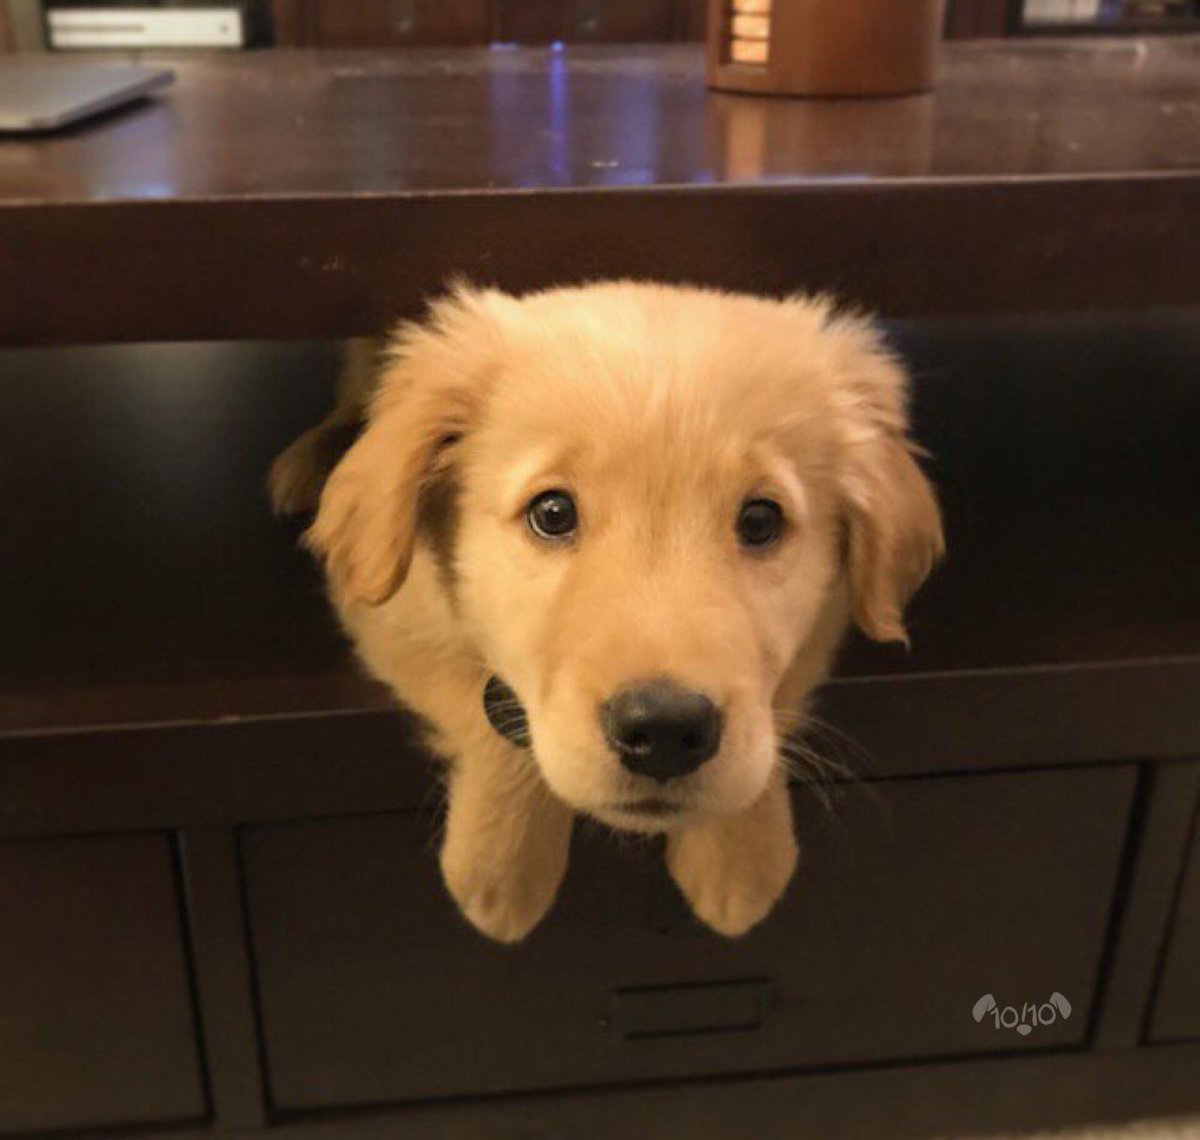

In [70]:
# Retrieve the image for the first dog
url = df_golden_retriever.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

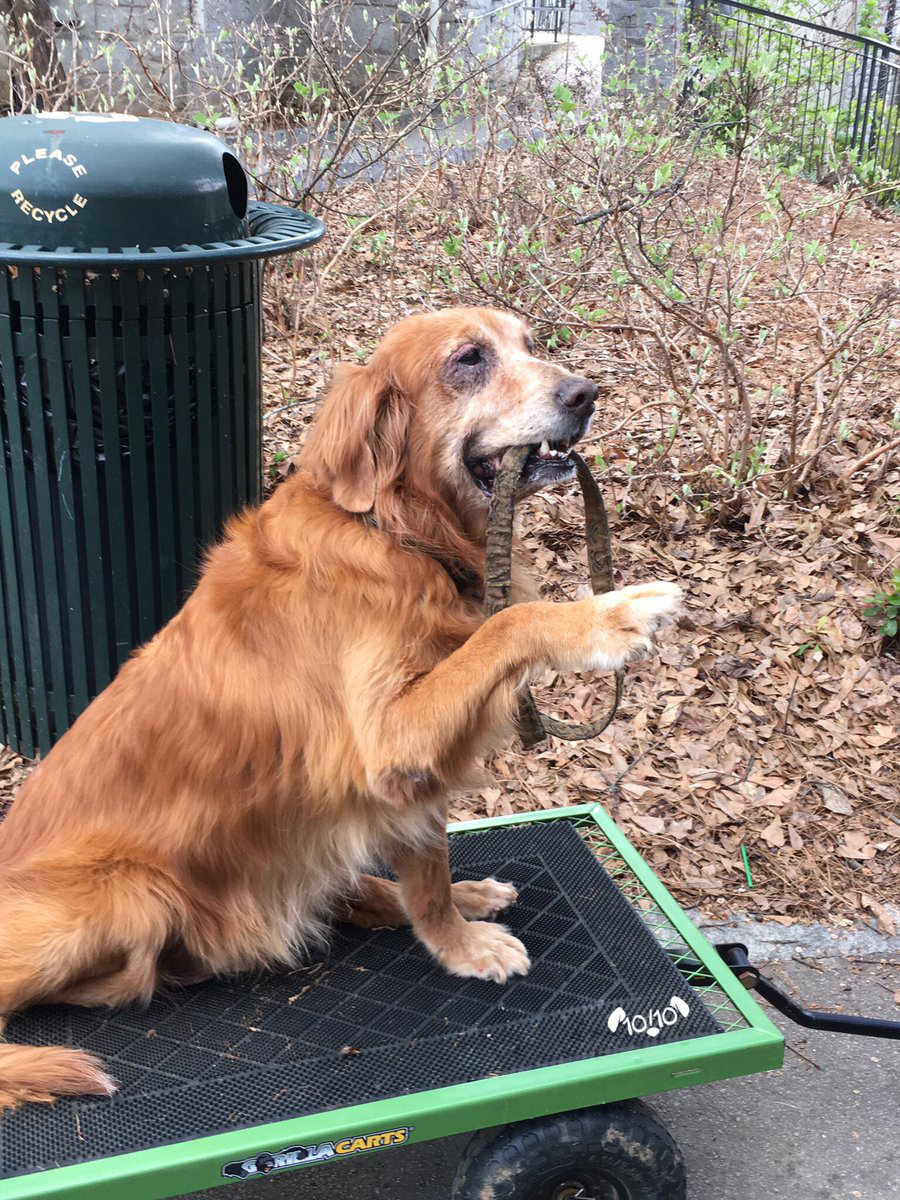

In [71]:
# Retrieve the image for the second dog
url = df_golden_retriever.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

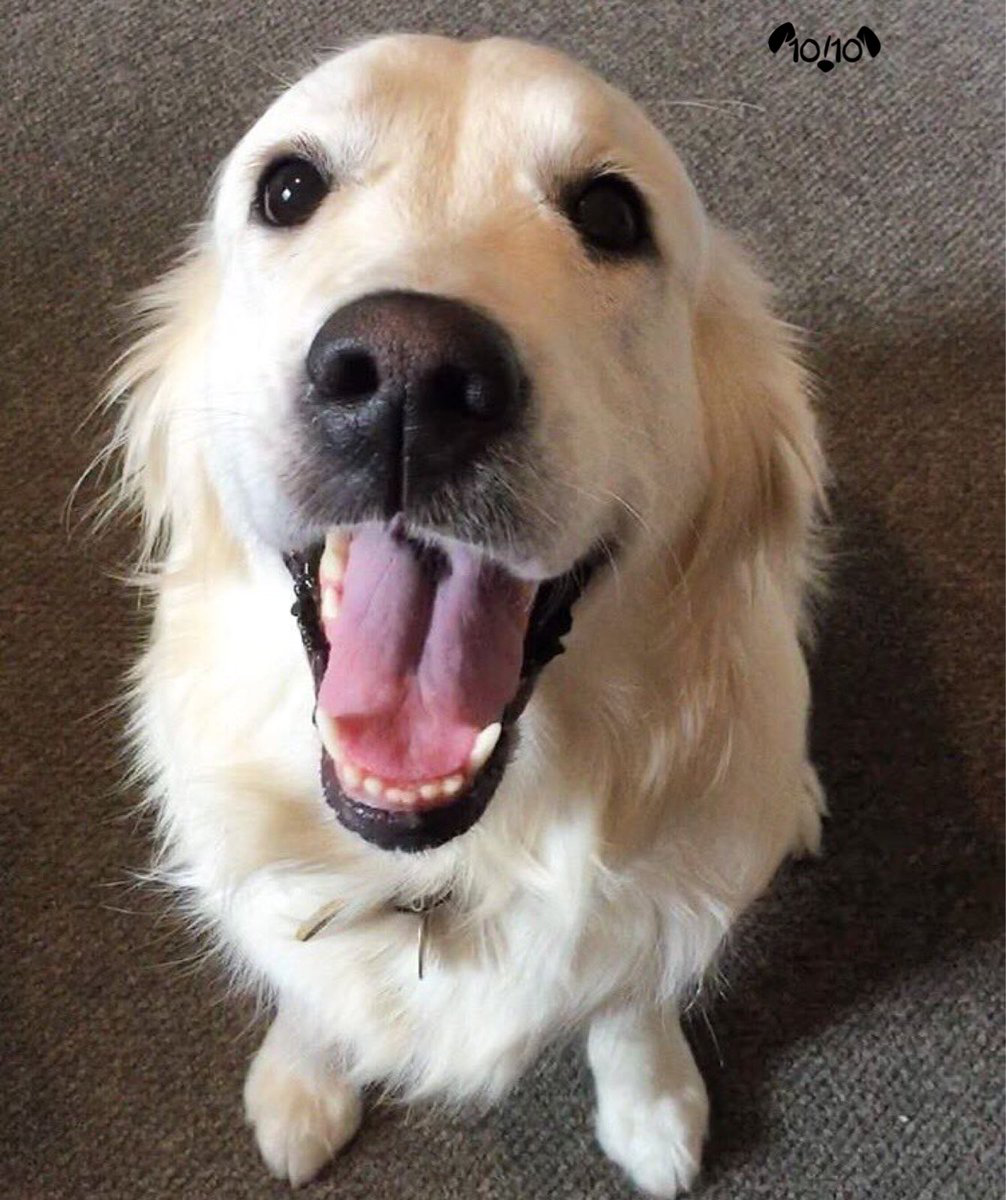

In [72]:
# Retrieve the image for the third dog
url = df_golden_retriever.jpg_url.iloc[2]
r = requests.get(url)
Image.open(BytesIO(r.content))

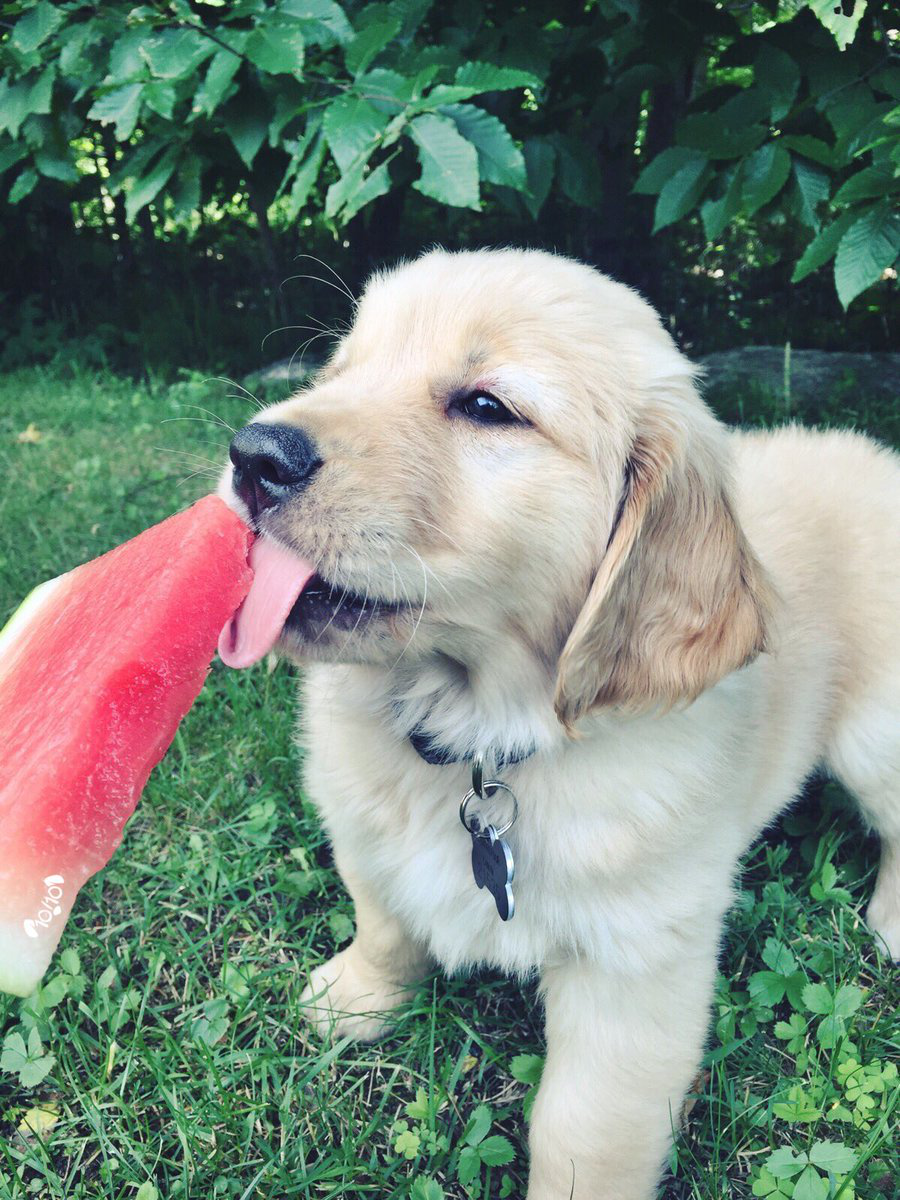

In [73]:
# Retrieve the image for the fourth dog
url = df_golden_retriever.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

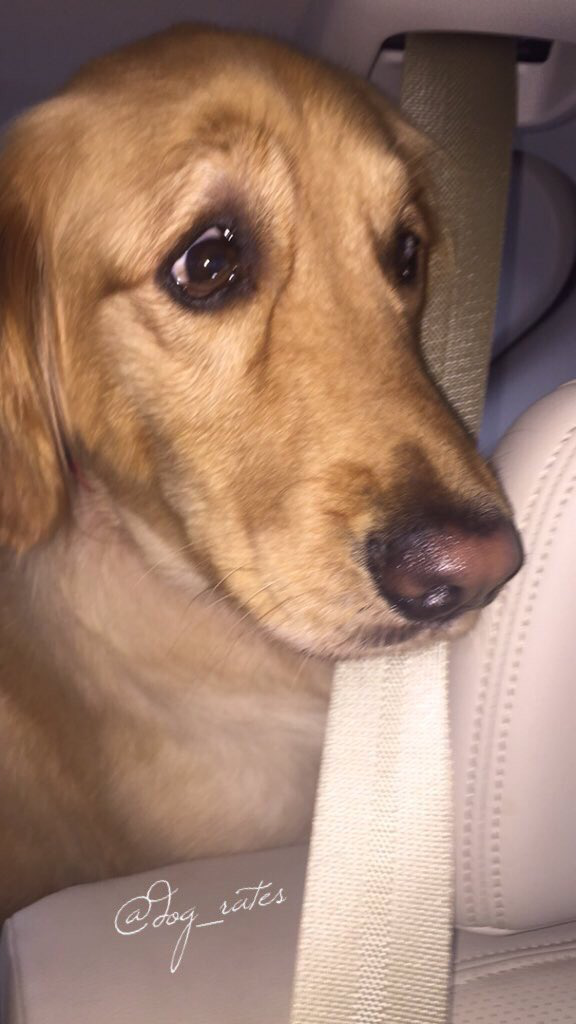

In [74]:
# Retrieve the image for the fifth dog
url = df_golden_retriever.jpg_url.iloc[4]
r = requests.get(url)
Image.open(BytesIO(r.content))

### Insight three

### Top 5 Dogs with Lowest Rating

In [75]:
# Group the twitter_archive_master by the prediction_1 column and assign to dog_rating_df
dog_rating_df = twitter_archive_master.groupby('prediction_1').count()

# Get the value count of rating_numerator fo the dog_rating_df
dog_rating_df['rating_numerator'].value_counts()

1     145
2      39
3      28
4      22
6       9
5       7
10      7
8       6
9       6
7       5
16      5
11      4
12      3
20      2
13      1
96      1
14      1
68      1
17      1
22      1
23      1
25      1
28      1
32      1
34      1
42      1
61      1
67      1
15      1
Name: rating_numerator, dtype: int64

In [76]:
# Sort dog_rating_df and retrieve the top five 
dog_rating_df['rating_numerator'].sort_values().head(5)

prediction_1
fountain       1
grille         1
groenendael    1
guenon         1
hand_blower    1
Name: rating_numerator, dtype: int64

### Visualization

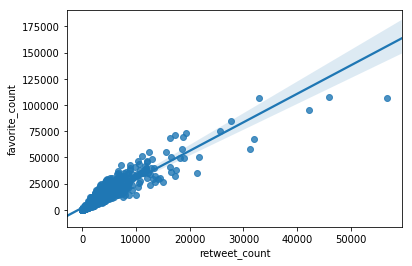

In [77]:
# Line chart for correlation between retweet count and favourite count
sns.regplot(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count);

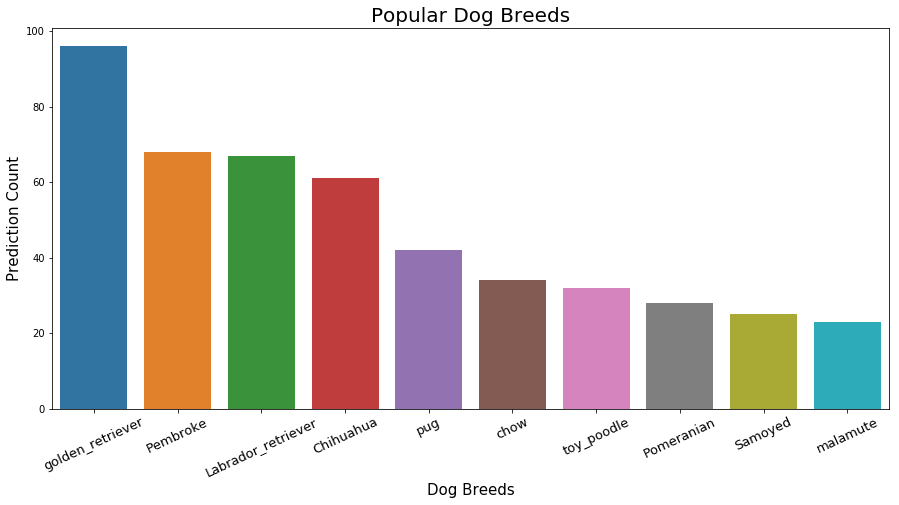

In [78]:
# create a barchart for the Popular dog breed
plt.figure(figsize = (15,7))
ax = sns.barplot(x = twitter_archive_master['prediction_1'].value_counts()[0:10].index,
            y =twitter_archive_master['prediction_1'].value_counts()[0:10],
            data = twitter_archive_master);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 25, fontsize = 13);
plt.xlabel("Dog Breeds",fontsize = 15);
plt.ylabel("Prediction Count",fontsize = 15);
plt.title("Popular Dog Breeds",fontsize = 20);

## References

* geeksforgeeks - https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
* Pandas documentation concat - https://pandas.pydata.org/docs/reference/api/pandas.concat.html
* Python for loops - https://www.w3schools.com/python/python_for_loops.asp